# House Prices
#### Ryan Peralta, Jonathan Wang, Yillian Wu
#### CS 4661
#### Fall 2019
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview



In [1]:
# Importing numpy and pandas and other modules
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt

#### Code that will help with graphing results later on

In [2]:
#Code for best fit line is found here:
#https://stackoverflow.com/questions/22239691/code-for-best-fit-straight-line-of-a-scatter-plot-in-python
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    return a, b


### Reading the csv into a dataframe

In [3]:
#Reading the csv downloaded from Kaggle into a dataframe
houses_df = pd.read_csv("House_Prices.csv")

#Combined the seperated csv from kaggle into one csv for better testing.
houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## 1a.) Linear Regression with select features
### Initial run with only 10 selected features
Establish a baseline for the project.
Every model we use after this should have a lower RMSE.

In [4]:
# Creating the Feature Matrix:
# hand selected features that we thought would give us a decent regression.
feature_cols = ['LotArea','Neighborhood', 'BldgType', 'HouseStyle','YearBuilt', 'FullBath', 'YearRemodAdd', 'Foundation','SaleType', 'SaleCondition']

# Get X from the training data
X = houses_df[feature_cols]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
X.head()

,LotArea,Neighborhood,BldgType,HouseStyle,YearBuilt,FullBath,YearRemodAdd,Foundation,SaleType,SaleCondition
0,8450,CollgCr,1Fam,2Story,2003,2,2003,PConc,WD,Normal
1,9600,Veenker,1Fam,1Story,1976,2,1976,CBlock,WD,Normal
2,11250,CollgCr,1Fam,2Story,2001,2,2002,PConc,WD,Normal
3,9550,Crawfor,1Fam,2Story,1915,1,1970,BrkTil,WD,Abnorml
4,14260,NoRidge,1Fam,2Story,2000,2,2000,PConc,WD,Normal


### Use label encoding to convert the string values into numbers

In [5]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
X['Neighborhood']= label_encoder.fit_transform(X['Neighborhood']) 
X['BldgType']= label_encoder.fit_transform(X['BldgType']) 
X['HouseStyle']= label_encoder.fit_transform(X['HouseStyle']) 
X['Foundation']= label_encoder.fit_transform(X['Foundation'])
X['SaleType'] = label_encoder.fit_transform(X['SaleType'].astype(str))
X['SaleCondition']= label_encoder.fit_transform(X['SaleCondition'])  
X.head()


C:\Users\rpera\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\rpera\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rpera\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

,LotArea,Neighborhood,BldgType,HouseStyle,YearBuilt,FullBath,YearRemodAdd,Foundation,SaleType,SaleCondition
0,8450,5,0,5,2003,2,2003,2,8,4
1,9600,24,0,2,1976,2,1976,1,8,4
2,11250,5,0,5,2001,2,2002,2,8,4
3,9550,6,0,5,1915,1,1970,0,8,0
4,14260,15,0,5,2000,2,2000,2,8,4


### Splitting the Dataset into testing and training

In [6]:
# Splitting the dataset into testing and training:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [7]:
linear_reg_houses = LinearRegression()
# fitting the model to the training data:
linear_reg_houses.fit(X_train, y_train)

# printing Theta0 using attribute "intercept_":
print(linear_reg_houses.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(linear_reg_houses.coef_)

-1070994.724813176
[ 1.58850512e+00  7.62004931e+02 -6.26278101e+03  8.25112801e+02
  3.31556307e+02  2.67069687e+04  2.72103173e+02  5.09823459e+02
 -2.47888906e+03  2.22912976e+03]


In [8]:
# make predictions on the testing set
y_prediction = linear_reg_houses.predict(X_test)

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_prediction)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

49367.798232765104


### RMSE = 49367.79
This is the baseling RMSE that we are going to be using.
The goal for the other techniques we are going to use is to lower the RMSE and see which model is the best.

## 1b.) Linear Regression with OneHot encoding
This is going to build off of the last model, but after using label encoding, we are going to use onehot encoding as well.

In [10]:
#Reading the csv downloaded from Kaggle into a dataframe
houses_df = pd.read_csv("House_Prices.csv")

#Combined the seperated csv from kaggle into one csv for better testing.

# Creating the Feature Matrix:
# hand selected features that we thought would give us a decent regression.
feature_cols = ['LotArea','Neighborhood', 'BldgType', 'HouseStyle','YearBuilt', 'FullBath', 'YearRemodAdd', 'Foundation','SaleType', 'SaleCondition']

# Get X from the training data
X = houses_df[feature_cols]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
X['Neighborhood']= label_encoder.fit_transform(X['Neighborhood']) 
X['BldgType']= label_encoder.fit_transform(X['BldgType']) 
X['HouseStyle']= label_encoder.fit_transform(X['HouseStyle']) 
X['Foundation']= label_encoder.fit_transform(X['Foundation'])
X['SaleType'] = label_encoder.fit_transform(X['SaleType'].astype(str))
X['SaleCondition']= label_encoder.fit_transform(X['SaleCondition'])  
X.head()


C:\Users\rpera\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\rpera\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\rpera\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

,LotArea,Neighborhood,BldgType,HouseStyle,YearBuilt,FullBath,YearRemodAdd,Foundation,SaleType,SaleCondition
0,8450,5,0,5,2003,2,2003,2,8,4
1,9600,24,0,2,1976,2,1976,1,8,4
2,11250,5,0,5,2001,2,2002,2,8,4
3,9550,6,0,5,1915,1,1970,0,8,0
4,14260,15,0,5,2000,2,2000,2,8,4


In [11]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [1,2,3,7,8,9])
X_onehot = onehotencoder.fit_transform(X).toarray()
X = pd.DataFrame(X_onehot)
X.head()

C:\Users\rpera\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,8450.0,2003.0,2.0,2003.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,9600.0,1976.0,2.0,1976.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,11250.0,2001.0,2.0,2002.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,9550.0,1915.0,1.0,1970.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,14260.0,2000.0,2.0,2000.0


In [12]:
# Splitting the dataset into testing and training:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

linear_reg_houses = LinearRegression()
# fitting the model to the training data:
linear_reg_houses.fit(X_train, y_train)

# printing Theta0 using attribute "intercept_":
print(linear_reg_houses.intercept_)

# printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(linear_reg_houses.coef_)

# make predictions on the testing set
y_prediction = linear_reg_houses.predict(X_test)

-723209.3045479711
[ 5.76978843e+03  1.48612316e+04  6.67901814e+03 -2.11674828e+04
 -9.19883461e+03 -1.21089243e+04  1.16911804e+04 -2.03946504e+04
 -2.85938839e+04 -1.70502325e+04 -2.91802044e+02 -1.59572566e+04
 -7.77807022e+03  7.79460004e+03 -8.33449824e+03  6.51066284e+04
  3.46210184e+04 -8.27714678e+03 -1.20343175e+04 -1.53557087e+04
 -1.28691429e+04 -6.11628023e+03  4.78817088e+04 -1.56069019e+04
  1.67299595e+04  2.01962603e+04  7.05231847e+03  6.84198709e+03
 -2.04483319e+04 -1.36422340e+04  1.34326685e+03 -2.63589030e+04
 -7.39987024e+03  1.74194607e+04  2.26235530e+04  3.38799904e+03
 -7.00301543e+03 -4.01249098e+03 -5.40640926e+02 -6.93632576e+02
  3.94044900e+03 -1.96724485e+04  1.29856438e+04  3.98062929e+03
 -1.83040046e+04  1.25181796e+02  3.41722659e+04 -8.92301954e+03
  1.78071819e+04 -2.92639633e+04  1.39526189e+04  3.84062476e+03
 -2.44126194e+04  1.10057336e+04 -5.20585507e+03  1.19749636e+04
  1.85882584e+04 -2.36475573e+03 -9.34540419e+02 -2.20580708e+04
  1.47

In [13]:
# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, y_prediction)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

47787.080436974284


### RMSE = 47786.45
This is the new lowest RMSE.
One hot encoding on the previous model allowed us to get a lower value.

We should look into using label and one hot encoding for the other regression techniques we are going to use.

## 1c.) Linear Regression and cross validation
Continue using one hot encoding but now use cross validation to get a more accuracte RMSE

In [14]:
#Reading the csv downloaded from Kaggle into a dataframe
houses_df = pd.read_csv("House_Prices.csv")

#Combined the seperated csv from kaggle into one csv for better testing.

# Creating the Feature Matrix:
# hand selected features that we thought would give us a decent regression.
feature_cols = ['LotArea','Neighborhood', 'BldgType', 'HouseStyle','YearBuilt', 'FullBath', 'YearRemodAdd', 'Foundation','SaleType', 'SaleCondition']

# Get X from the training data
X = houses_df[feature_cols]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
X['Neighborhood']= label_encoder.fit_transform(X['Neighborhood']) 
X['BldgType']= label_encoder.fit_transform(X['BldgType']) 
X['HouseStyle']= label_encoder.fit_transform(X['HouseStyle']) 
X['Foundation']= label_encoder.fit_transform(X['Foundation'])
X['SaleType'] = label_encoder.fit_transform(X['SaleType'].astype(str))
X['SaleCondition']= label_encoder.fit_transform(X['SaleCondition'])  

C:\Users\rpera\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\rpera\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\rpera\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexi

In [15]:
# function cross_val_score performs Cross Validation:
linear_reg_houses = LinearRegression()
accuracy_list_lr = cross_val_score(linear_reg_houses, X, y, cv=10, scoring='neg_mean_squared_error')

In [16]:
def List_Average(x): 
    return sum(x) / len(x) 

rmse_list = []
for l in accuracy_list_lr:
    x = np.sqrt(-1* l)
    #print(x)
    rmse_list.append(x)
    

print("Linear Regression:                   ", List_Average(rmse_list))

Linear Regression:                    46602.33014125868


### RMSE = 46602.33
This is the new lowest RMSE.
By using cross validation, we were able to lower the RMSE from part 1b


####  We are now going to go back and run cross validaton on 1a to double check that 1c is supperior.

In [17]:
# Creating the Feature Matrix:
# hand selected features that we thought would give us a decent regression.
feature_cols = ['LotArea','Neighborhood', 'BldgType', 'HouseStyle','YearBuilt', 'FullBath', 'YearRemodAdd', 'Foundation','SaleType', 'SaleCondition']

# Get X from the training data
X = houses_df[feature_cols]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
X['Neighborhood']= label_encoder.fit_transform(X['Neighborhood']) 
X['BldgType']= label_encoder.fit_transform(X['BldgType']) 
X['HouseStyle']= label_encoder.fit_transform(X['HouseStyle']) 
X['Foundation']= label_encoder.fit_transform(X['Foundation'])
X['SaleType'] = label_encoder.fit_transform(X['SaleType'].astype(str))
X['SaleCondition']= label_encoder.fit_transform(X['SaleCondition'])  

from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = [1,2,3,7,8,9])
X_onehot = onehotencoder.fit_transform(X).toarray()
X = pd.DataFrame(X_onehot)

# function cross_val_score performs Cross Validation:
linear_reg_houses = LinearRegression()
accuracy_list_lr_le = cross_val_score(linear_reg_houses, X, y, cv=10, scoring='neg_mean_squared_error')

rmse_list_le = []
for l in accuracy_list_lr_le:
    x = np.sqrt(-1* l)
    #print(x)
    rmse_list_le.append(x)
    


C:\Users\rpera\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\rpera\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rpera\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable

In [18]:
print("Linear Regression(One Hot Encoding Only):                   ", List_Average(rmse_list_le))

Linear Regression(One Hot Encoding Only):                    46753.48470209217


### Linear Regression with Label Encoding and One Hot Encoding is still the best
Linear Regression with One Hot Encoding Only has an RMSE of 46753.48

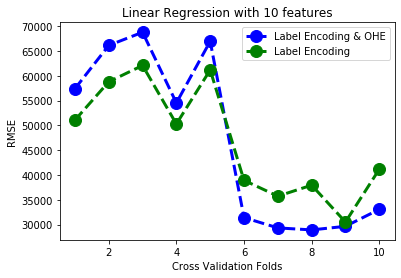

In [19]:
x_values = range(1, len(rmse_list)+1)
data_points1 = rmse_list 
data_points2 = rmse_list_le
line1, = plt.plot(x_values, data_points1,color='blue', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12, label='Label Encoding & OHE')
line2, = plt.plot(x_values, data_points2,color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='green', markersize=12, label='Label Encoding')

plt.legend(handles=[line1, line2])

# naming the x axis 
plt.xlabel('Cross Validation Folds') 
# naming the y axis 
plt.ylabel('RMSE') 
  
# giving a title the graph
plt.title('Linear Regression with 10 features')
plt.show()

## 2a.) Linear Regression with all features
We are now going to use linear regression with all of the features

### Here we are going through the data set and checking which features need to be label encoded.

In [20]:
column_list = []
for col in houses_df.columns: 
    column_list.append(col)
all_features = column_list[1:-1]
#print(all_features)


#List of features that DO NOT need to be label encoded!
#On the CSV, A = 1, B = 2, etc.
nums = [2,4,5,18,19,20,21,27,35,37,38,39,44,45,46,47,48,49,50,51,52,53,55,57,
                   60,62,63,67,68,69,70,71,72,76,77,78]

#Need to edit nums so that the features are correctly indexed!
num_features = []
for x in nums:
    num_features.append(x -1)

numeric_features =[]
for x in column_list:
    if len(num_features) > 0 and x == column_list[num_features[0]]:
       # print(x, " ", num_features[0])
        numeric_features.append(x)
        num_features.pop(0)
            
            
print(numeric_features)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [21]:
def diff(list1, list2):
    c = set(list1).union(set(list2))  # or c = set(list1) | set(list2)
    d = set(list1).intersection(set(list2))  # or d = set(list1) & set(list2)
    return list(c - d)

string_features = diff(all_features, numeric_features)
#print(string_features)

### Now that we have a list of the features that contain strings, we can use label encoding on the correct features.

In [22]:
# Get X from the training data
X = houses_df[all_features]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']
#X.head()

In [23]:
label_encoder = preprocessing.LabelEncoder()
for feat in string_features:
    #print(feat)
    X[feat] = label_encoder.fit_transform(X[feat].astype(str))
X.head()

C:\Users\rpera\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,0,3,4,4,0,2,2008,8,4
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,0,3,4,4,0,5,2007,8,4
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,0,3,4,4,0,9,2008,8,4
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,0,3,4,4,0,2,2006,8,0
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,0,3,4,4,0,12,2008,8,4


In [24]:
#Need to replace NaN with 0 or else LinearRegression will not work.
X.fillna(0, inplace=True)

C:\Users\rpera\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [25]:
linear_reg_houses = LinearRegression()
accuracy_list_lr_all = cross_val_score(linear_reg_houses, X, y, cv=10, scoring='neg_mean_squared_error')

In [26]:
# function cross_val_score performs Cross Validation:


rmse_list_lr_all = []
for l in accuracy_list_lr_all:
    x = np.sqrt(-1* l)
    rmse_list_lr_all.append(x)
    
print("Linear Regression(All Features - Label Encoding):                   ", List_Average(rmse_list_lr_all))

Linear Regression(All Features - Label Encoding):                    45200.436060971246


### RMSE = 45200.43
This is the new lowest RMSE.

By using information from all features and sanitizing it, it allowed us to get better results


## 2b.) Use One Hot Encoding with Label Encoding
We are now going to apply One Hot Encoding to all of the features that we used Label Encoding for.

In [27]:
nums = [2,4,5,18,19,20,21,27,35,37,38,39,44,45,46,47,48,49,50,51,52,53,55,57,
                   60,62,63,67,68,69,70,71,72,76,77,78]

#Need to edit nums so that the features are correctly indexed!
num_features = []
for x in nums:
    num_features.append(x -1)
    
string_indexs = []
for i in range(1,80):
    if not (i in num_features):
        string_indexs.append(i) 

numeric_features =[]
for x in column_list:
    if len(num_features) > 0 and x == column_list[num_features[0]]:
       # print(x, " ", num_features[0])
        numeric_features.append(x)
        num_features.pop(0)
            

# Get X from the training data
X = houses_df[all_features]
# select the target (last column) from the DataFrame
y = houses_df['SalePrice']


label_encoder = preprocessing.LabelEncoder()
for feat in string_features:
    #print(feat)
    X[feat] = label_encoder.fit_transform(X[feat].astype(str))

X.fillna(0, inplace=True)
X.head()

C:\Users\rpera\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\rpera\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,0,3,4,4,0,2,2008,8,4
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,0,3,4,4,0,5,2007,8,4
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,0,3,4,4,0,9,2008,8,4
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,0,3,4,4,0,2,2006,8,0
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,0,3,4,4,0,12,2008,8,4


In [28]:
#One Hot Encoding is broken!
"""from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder(categorical_features = string_indexs)
X_onehot = onehotencoder.fit_transform(X).toarray()
X = pd.DataFrame(X_onehot)
X.head()"""

'from sklearn.preprocessing import OneHotEncoder\nonehotencoder = OneHotEncoder(categorical_features = string_indexs)\nX_onehot = onehotencoder.fit_transform(X).toarray()\nX = pd.DataFrame(X_onehot)\nX.head()'

In [29]:
# function cross_val_score performs Cross Validation:
linear_reg_houses = LinearRegression()
accuracy_list_lr_le_and_ohe = cross_val_score(linear_reg_houses, X, y, cv=10, scoring='neg_mean_squared_error')

# function cross_val_score performs Cross Validation:


rmse_list_lr_le_and_ohe = []
for l in accuracy_list_lr_le_and_ohe:
    x = np.sqrt(-1* l)
    rmse_list_lr_le_and_ohe.append(x)
    
print("Linear Regression(All Features - Label Encoding & OHE):                   ", List_Average(rmse_list_lr_le_and_ohe))

Linear Regression(All Features - Label Encoding & OHE):                    45200.436060971246


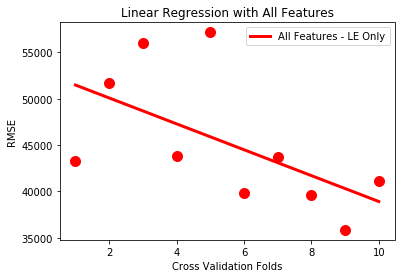

In [30]:
x_values = range(1, len(rmse_list_lr_all)+1)
data_points1 = rmse_list_lr_all 

# solution
a, b = best_fit(x_values, data_points1)
#best fit line:
#y = 0.80 + 0.92x

# plot points and fit line
plt.scatter(x_values, data_points1,color='red',s=100)
yfit = [a + b * xi for xi in x_values]
line1, =plt.plot(x_values, yfit,linewidth = 3,color='red', markerfacecolor='red', markersize=12, label='All Features - LE Only')
#line1, = plt.plot(x_values, data_points1,color='red', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='red', markersize=12, label='All Features - LE Only')
plt.legend(handles=[line1])

# naming the x axis 
plt.xlabel('Cross Validation Folds') 
# naming the y axis 
plt.ylabel('RMSE') 
  
# giving a title the graph
plt.title('Linear Regression with All Features')
plt.show()